# Manipulate data with `dplyr`

---

## Fundamentals of ETL: data extraction, transformation and loading


Applied Mathematical Modeling in Banking

---

# Table of contents

1. What's `dplyr`
2. Exploring our data with dplyr `dplyr`


---

# 1.What's `dplyr`

The `dplyr` package is one of the most powerful and popular package in `R` for data manipulation. 

Working with data:

- [x] Figure out what you want to do.
- [x] Describe those tasks in the form of a computer program.
- [x] Execute the program.

The `dplyr` package makes these steps fast and easy:

- [x] By constraining your options, it helps you think about your data manipulation challenges.
- [x] It provides simple `verbs`, functions that correspond to the most common data manipulation tasks, to help you translate your thoughts into code.
- [x] It uses efficient backends, so you spend less time waiting for the computer.

Before use you should install package:

In [1]:
install.packages("dplyr")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



Next step is loading package:

In [46]:
library(dplyr)

`dplyr` functions work with pipes and expect `tidy data`. In tidy data:

![](assets/images/03/dplyr1.png)

Alternative way is to load `tidyverse` package with other attached:

In [2]:
#install.packages("tidyverse")
library(tidyverse)
# to tidyverse attached packages
#tidyverse_packages(include_self = TRUE)
# зачем это знать?..

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.6
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

Warning message:
“package ‘tibble’ was built under R version 4.0.5”
Warning message:
“package ‘readr’ was built under R version 4.0.5”
Warning message:
“package ‘stringr’ was built under R version 4.0.5”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



---

# 2. Exploring our data with dplyr `dplyr`

## 2.1. Funtions and dataset explore

There are most popular functions in `dplyr` is listed in table.

|dplyr Function|Description	| Equivalent SQL|
|---|---|---|
|select()	|Selecting columns (variables)	|SELECT|
|filter()	|Filter (subset) rows.	|WHERE|
|group_by()|	Group the data	|GROUP BY|
|summarise()|	Summarise (or aggregate) data|	-|
|arrange()|	Sort the data	|ORDER BY
|join()|	Joining data frames (tables)|	JOIN|
|mutate()	|Creating New Variables|	COLUMN ALIAS|

For the next sample we are going to use `gapminder` dataset. [Go to gapminder dataset description](00_Datasets.ipynb#gapminder)

The `gapminder` data frame include six variables:


|variable|meaning|
|---|---|
|country| - |	
|continent| - |		
|year| - |	
|lifeExp|	life expectancy at birth|
|pop	|total population|
|gdpPercap|	per-capita GDP|

`Per-capita GDP` (Gross domestic product) is given in units of international dollars, `a hypothetical unit of currency that has the same purchasing power parity that the U.S. dollar had in the United States at a given point in time` – 2005, in this case.

The `gapminder` data frame is a special kind of data frame: a `tibble`. 

In [47]:
install.packages("gapminder")
library(gapminder)  # load package and dataset
class(gapminder)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



[1] "tbl_df"     "tbl"        "data.frame"

Let's preview it with functions `str()`, `glimpse()`, `head()`, `tail()`, `summary()`.

In [48]:
str(gapminder)

tibble [1,704 × 6] (S3: tbl_df/tbl/data.frame)
 $ country  : Factor w/ 142 levels "Afghanistan",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ continent: Factor w/ 5 levels "Africa","Americas",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ year     : int [1:1704] 1952 1957 1962 1967 1972 1977 1982 1987 1992 1997 ...
 $ lifeExp  : num [1:1704] 28.8 30.3 32 34 36.1 ...
 $ pop      : int [1:1704] 8425333 9240934 10267083 11537966 13079460 14880372 12881816 13867957 16317921 22227415 ...
 $ gdpPercap: num [1:1704] 779 821 853 836 740 ...


In [6]:
glimpse(gapminder)

Rows: 1,704
Columns: 6
$ country   <fct> "Afghanistan", "Afghanistan", "Afghanistan", "Afghanistan", …
$ continent <fct> Asia, Asia, Asia, Asia, Asia, Asia, Asia, Asia, Asia, Asia, …
$ year      <int> 1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, …
$ lifeExp   <dbl> 28.801, 30.332, 31.997, 34.020, 36.088, 38.438, 39.854, 40.8…
$ pop       <int> 8425333, 9240934, 10267083, 11537966, 13079460, 14880372, 12…
$ gdpPercap <dbl> 779.4453, 820.8530, 853.1007, 836.1971, 739.9811, 786.1134, …


In [49]:
head(gapminder) #shows first n-rows, 6 by default

country,continent,year,lifeExp,pop,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
Afghanistan,Asia,1952,28.801,8425333,779.4453
Afghanistan,Asia,1957,30.332,9240934,820.8530
Afghanistan,Asia,1962,31.997,10267083,853.1007
Afghanistan,Asia,1967,34.020,11537966,836.1971
Afghanistan,Asia,1972,36.088,13079460,739.9811
Afghanistan,Asia,1977,38.438,14880372,786.1134


In [12]:
tail(gapminder) #shows last n-rows, 6 by default

country,continent,year,lifeExp,pop,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
Zimbabwe,Africa,1982,60.363,7636524,788.8550
Zimbabwe,Africa,1987,62.351,9216418,706.1573
Zimbabwe,Africa,1992,60.377,10704340,693.4208
Zimbabwe,Africa,1997,46.809,11404948,792.4500
Zimbabwe,Africa,2002,39.989,11926563,672.0386
Zimbabwe,Africa,2007,43.487,12311143,469.7093


In [13]:
summary(gapminder)

        country        continent        year         lifeExp     
 Afghanistan:  12   Africa  :624   Min.   :1952   Min.   :23.60  
 Albania    :  12   Americas:300   1st Qu.:1966   1st Qu.:48.20  
 Algeria    :  12   Asia    :396   Median :1980   Median :60.71  
 Angola     :  12   Europe  :360   Mean   :1980   Mean   :59.47  
 Argentina  :  12   Oceania : 24   3rd Qu.:1993   3rd Qu.:70.85  
 Australia  :  12                  Max.   :2007   Max.   :82.60  
 (Other)    :1632                                                
      pop              gdpPercap       
 Min.   :6.001e+04   Min.   :   241.2  
 1st Qu.:2.794e+06   1st Qu.:  1202.1  
 Median :7.024e+06   Median :  3531.8  
 Mean   :2.960e+07   Mean   :  7215.3  
 3rd Qu.:1.959e+07   3rd Qu.:  9325.5  
 Max.   :1.319e+09   Max.   :113523.1  
                                       

## 2.2. filter() function

In [56]:
austria <- filter(gapminder, country == "Austria")
austria

country,continent,year,lifeExp,pop,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
Austria,Europe,1952,66.800,6927772,6137.076
Austria,Europe,1957,67.480,6965860,8842.598
Austria,Europe,1962,69.540,7129864,10750.721
Austria,Europe,1967,70.140,7376998,12834.602
Austria,Europe,1972,70.630,7544201,16661.626
Austria,Europe,1977,72.170,7568430,19749.422
Austria,Europe,1982,73.180,7574613,21597.084
Austria,Europe,1987,74.940,7578903,23687.826
Austria,Europe,1992,76.040,7914969,27042.019


`filter()` takes logical expressions and returns the rows for which all are TRUE.

In [51]:
# task: select rows with lifeExp less than 31
filter(gapminder, lifeExp < 31)

country,continent,year,lifeExp,pop,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
Afghanistan,Asia,1952,28.801,8425333,779.4453
Afghanistan,Asia,1957,30.332,9240934,820.8530
Angola,Africa,1952,30.015,4232095,3520.6103
Gambia,Africa,1952,30.000,284320,485.2307
Rwanda,Africa,1992,23.599,7290203,737.0686
Sierra Leone,Africa,1952,30.331,2143249,879.7877


In [67]:
# task: select Austria only and year after 1980
filter(gapminder, country == "Austria", year > 1980)

country,continent,year,lifeExp,pop,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
Canada,Americas,1982,75.760,25201900,22898.79
Canada,Americas,1987,76.860,26549700,26626.52
Canada,Americas,1992,77.950,28523502,26342.88
Canada,Americas,1997,78.610,30305843,28954.93
Canada,Americas,2002,79.770,31902268,33328.97
Canada,Americas,2007,80.653,33390141,36319.24


In [74]:
# task: select Austria and Belgium
filter(gapminder, country %in% c("Austria", "Belgium"))

country,continent,year,lifeExp,pop,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
Austria,Europe,1952,66.800,6927772,6137.076
Austria,Europe,1957,67.480,6965860,8842.598
Austria,Europe,1962,69.540,7129864,10750.721
Austria,Europe,1967,70.140,7376998,12834.602
Austria,Europe,1972,70.630,7544201,16661.626
Austria,Europe,1977,72.170,7568430,19749.422
Austria,Europe,1982,73.180,7574613,21597.084
Austria,Europe,1987,74.940,7578903,23687.826
Austria,Europe,1992,76.040,7914969,27042.019


Lets rewrite initial code and record it to the variable/data.frame:

## 2.3. Pipe (%>%) operator

`%>%` is `pipe` operator. The pipe operator takes the thing on the left-hand-side and pipes it into the function call on the right-hand-side – literally, drops it in as the first argument.

`head()` function without pipe and top 4 items:

> In R version before 4.1.0 `pipe` `%>%` operator is not a language build-in and you should install `magrittr` package:

In [17]:
#install.packages("magrittr") # for pipe %>% operator
library(magrittr)

In [57]:
head(gapminder, n = 4)

country,continent,year,lifeExp,pop,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
Afghanistan,Asia,1952,28.801,8425333,779.4453
Afghanistan,Asia,1957,30.332,9240934,820.8530
Afghanistan,Asia,1962,31.997,10267083,853.1007
Afghanistan,Asia,1967,34.020,11537966,836.1971


`head()` function with pipe and top 4 items:

In [58]:
gapminder %>% head(4)

country,continent,year,lifeExp,pop,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
Afghanistan,Asia,1952,28.801,8425333,779.4453
Afghanistan,Asia,1957,30.332,9240934,820.8530
Afghanistan,Asia,1962,31.997,10267083,853.1007
Afghanistan,Asia,1967,34.020,11537966,836.1971


Output is the same. So, let's rewrire filtering for `Austria` with pipe:

In [59]:
austria <- gapminder %>% filter(country == "Austria")
austria

country,continent,year,lifeExp,pop,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
Austria,Europe,1952,66.800,6927772,6137.076
Austria,Europe,1957,67.480,6965860,8842.598
Austria,Europe,1962,69.540,7129864,10750.721
Austria,Europe,1967,70.140,7376998,12834.602
Austria,Europe,1972,70.630,7544201,16661.626
Austria,Europe,1977,72.170,7568430,19749.422
Austria,Europe,1982,73.180,7574613,21597.084
Austria,Europe,1987,74.940,7578903,23687.826
Austria,Europe,1992,76.040,7914969,27042.019


In [60]:
# add more conditions in filter
austria <- gapminder %>% filter(country == "Austria", year > 2000)
austria

country,continent,year,lifeExp,pop,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
Austria,Europe,2002,78.980,8148312,32417.61
Austria,Europe,2007,79.829,8199783,36126.49


---

## 2.4. `select` function

Use `select()` to subset the data on variables/columns by `names` or `index`. You also can define order of columns with `select()`.

In [64]:
gapminder %>% 
select(year, country, pop) %>%
slice(1: 10)

year,country,pop
<int>,<fct>,<int>
1952,Afghanistan,8425333
1957,Afghanistan,9240934
1962,Afghanistan,10267083
1967,Afghanistan,11537966
1972,Afghanistan,13079460
1977,Afghanistan,14880372
1982,Afghanistan,12881816
1987,Afghanistan,13867957
1992,Afghanistan,16317921


Lets combine few functions with `pipe` (`%>%`):

Finally, lest extend our filtering:

In [66]:
# compare dplyr syntax with base R call
gapminder[gapminder$country == "Austria", c("year", "pop", "lifeExp")]

gapminder %>% 
filter(country == "Austria") %>%
select(year, pop, lifeExp)

year,pop,lifeExp
<int>,<int>,<dbl>
1952,6927772,66.800
1957,6965860,67.480
1962,7129864,69.540
1967,7376998,70.140
1972,7544201,70.630
1977,7568430,72.170
1982,7574613,73.180
1987,7578903,74.940
1992,7914969,76.040


year,pop,lifeExp
<int>,<int>,<dbl>
1952,6927772,66.800
1957,6965860,67.480
1962,7129864,69.540
1967,7376998,70.140
1972,7544201,70.630
1977,7568430,72.170
1982,7574613,73.180
1987,7578903,74.940
1992,7914969,76.040


You can remove some columns using `minus`(operator) and add few filter conditions:

In [67]:
austria <- gapminder %>% 
                filter(country == "Austria", year > 2000) %>%
                select(-continent, -gdpPercap) %>%
                head()
austria

country,year,lifeExp,pop
<fct>,<int>,<dbl>,<int>
Austria,2002,78.980,8148312
Austria,2007,79.829,8199783


You can insert different conditions about columns you need to `select`. 

In [74]:
gapminder %>%
    select(!where(is.numeric)) %>%  # its 1704 records, because of repeating some records
    slice(1:5)

country,continent
<fct>,<fct>
Afghanistan,Asia
Afghanistan,Asia
Afghanistan,Asia
Afghanistan,Asia
Afghanistan,Asia


Let's output all unique pairs `continent -> country` with `distinct()` function:

In [78]:
gapminder %>%
    select(country) %>%
    distinct() # its 142 records now

country
<fct>
Afghanistan
Albania
Algeria
Angola
Argentina
Australia
Austria
Bahrain
Bangladesh


---

## 2.5. Selecting random $N$ rows

The `sample_n()` function selects random rows from a data frame

In [82]:
gapminder %>% sample_n(5)

country,continent,year,lifeExp,pop,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
Pakistan,Asia,1997,61.818,135564834,2049.351
Denmark,Europe,2007,78.332,5468120,35278.419
Philippines,Asia,2002,70.303,82995088,2650.921
Iceland,Europe,1962,73.680,182053,10350.159
Nigeria,Africa,2002,46.608,119901274,1615.286


If you want make `pseudo-random generation` reprodusable use `set.seed()`. Seed is start point of random generation. Different seeds give different output.

In [128]:
set.seed(2021) # example, seed = 2021

The `sample_frac()` function selects random fraction rows from a data frame.
Let's select $1\%$ of data

In [86]:
set.seed(2021) # output not changing, uncomment it 
gapminder %>% sample_frac(0.1)

country,continent,year,lifeExp,pop,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
Libya,Africa,1962,47.808,1441863,6757.0308
Botswana,Africa,1997,52.556,1536536,8647.1423
Swaziland,Africa,1957,43.424,326741,1244.7084
Dominican Republic,Americas,1997,69.957,7992357,3614.1013
Iraq,Asia,2002,57.046,24001816,4390.7173
Libya,Africa,1987,66.234,3799845,11770.5898
Montenegro,Europe,1967,67.178,501035,5907.8509
New Zealand,Oceania,1957,70.260,2229407,12247.3953
Bulgaria,Europe,2007,73.005,7322858,10680.7928


## 2.6. Subset rows using their positions with `slice()`

### Description

- [x] `slice()` lets you index rows by their (integer) locations. It allows you to select, remove, and duplicate rows. It is accompanied by a number of helpers for common use cases:
- [x] `slice_head()` and `slice_tail()` select the first or last rows.
- [x] `slice_sample()` randomly selects rows.
- [x] `slice_min()` and `slice_max()` select rows with highest or lowest values of a variable.

If `.data` is a grouped_df, the operation will be performed on each group, so that (e.g.) `slice_head(df, n = 5)` will select the first five rows in each group.

### Samples

In [81]:
gapminder %>% slice(1) # top 1 row

country,continent,year,lifeExp,pop,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
Afghanistan,Asia,1952,28.801,8425333,779.4453


In [55]:
gapminder %>% slice(1:6) # top n = 6

country,continent,year,lifeExp,pop,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
Afghanistan,Asia,1952,28.801,8425333,779.4453
Afghanistan,Asia,1957,30.332,9240934,820.8530
Afghanistan,Asia,1962,31.997,10267083,853.1007
Afghanistan,Asia,1967,34.020,11537966,836.1971
Afghanistan,Asia,1972,36.088,13079460,739.9811
Afghanistan,Asia,1977,38.438,14880372,786.1134


In [65]:
gapminder %>% slice_head(n = 6) # works like head()

country,continent,year,lifeExp,pop,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
Afghanistan,Asia,1952,28.801,8425333,779.4453
Afghanistan,Asia,1957,30.332,9240934,820.8530
Afghanistan,Asia,1962,31.997,10267083,853.1007
Afghanistan,Asia,1967,34.020,11537966,836.1971
Afghanistan,Asia,1972,36.088,13079460,739.9811
Afghanistan,Asia,1977,38.438,14880372,786.1134


In [67]:
gapminder %>% slice_tail(n = 5) # works like tail()

country,continent,year,lifeExp,pop,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
Zimbabwe,Africa,1987,62.351,9216418,706.1573
Zimbabwe,Africa,1992,60.377,10704340,693.4208
Zimbabwe,Africa,1997,46.809,11404948,792.4500
Zimbabwe,Africa,2002,39.989,11926563,672.0386
Zimbabwe,Africa,2007,43.487,12311143,469.7093


**You can drop some recods with negative indexes:**

In [73]:
gapminder %>% slice(-c(1:3,5)) %>% # remove Afganistan years 1952, 1957, 1962 and 1972 
    head(6)

country,continent,year,lifeExp,pop,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
Afghanistan,Asia,1967,34.020,11537966,836.1971
Afghanistan,Asia,1977,38.438,14880372,786.1134
Afghanistan,Asia,1982,39.854,12881816,978.0114
Afghanistan,Asia,1987,40.822,13867957,852.3959
Afghanistan,Asia,1992,41.674,16317921,649.3414
Afghanistan,Asia,1997,41.763,22227415,635.3414


In [82]:
# Random rows selection with slice_sample()
gapminder %>% slice_sample(n = 5) #use set.seed() to fix random

country,continent,year,lifeExp,pop,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
Iceland,Europe,1977,76.110,221823,19654.9625
United States,Americas,1962,70.210,186538000,16173.1459
Haiti,Americas,1982,51.461,5198399,2011.1595
Eritrea,Africa,1997,53.378,4058319,913.4708
Egypt,Africa,1987,59.797,52799062,3885.4607


In [83]:
# Rows with minimum and maximum values of a variable
# Lets find top 5 records with minimum and maximum lifeExp in all dataset
gapminder %>% slice_min(lifeExp, n = 5)
gapminder %>% slice_max(lifeExp, n = 5)

country,continent,year,lifeExp,pop,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
Rwanda,Africa,1992,23.599,7290203,737.0686
Afghanistan,Asia,1952,28.801,8425333,779.4453
Gambia,Africa,1952,30.000,284320,485.2307
Angola,Africa,1952,30.015,4232095,3520.6103
Sierra Leone,Africa,1952,30.331,2143249,879.7877


country,continent,year,lifeExp,pop,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
Japan,Asia,2007,82.603,127467972,31656.07
"Hong Kong, China",Asia,2007,82.208,6980412,39724.98
Japan,Asia,2002,82.000,127065841,28604.59
Iceland,Europe,2007,81.757,301931,36180.79
Switzerland,Europe,2007,81.701,7554661,37506.42


---

## 2.7. Sorting with  **`arrange()`**

`arrange(.data, …)` function order rows by values of a column or columns (low to high)You can use with `desc()` to order from high to low. 

For example, we need to select top 10 countries in 2002  by lifeExp variable.

In [85]:
data2002 <- gapminder %>% 
                filter(year == 2002) %>%
                top_n(10, lifeExp) # select top 10 by lifeExp value
data2002

country,continent,year,lifeExp,pop,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
Australia,Oceania,2002,80.370,19546792,30687.75
Canada,Americas,2002,79.770,31902268,33328.97
"Hong Kong, China",Asia,2002,81.495,6762476,30209.02
Iceland,Europe,2002,80.500,288030,31163.20
Israel,Asia,2002,79.696,6029529,21905.60
Italy,Europe,2002,80.240,57926999,27968.10
Japan,Asia,2002,82.000,127065841,28604.59
Spain,Europe,2002,79.780,40152517,24835.47
Sweden,Europe,2002,80.040,8954175,29341.63


In [92]:
# sort by pop
t <- gapminder %>% arrange(continent)
t <- gapminder %>% arrange(continent,  country)
t <- gapminder %>% arrange(continent, desc( country))

---

## 2.7. Create new variables with **`mutate()`**

`mutate(.data, …)` compute new column(s). 
Lets compute new column for `data2002` $gdpTotal = gdpPercap * pop / 1000000$.


In [95]:
gapminder %>% 
mutate(gdpTotal = gdpPercap * pop) %>%
head(10)

country,continent,year,lifeExp,pop,gdpPercap,gdpTotal
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>,<dbl>
Afghanistan,Asia,1952,28.801,8425333,779.4453,6567086330
Afghanistan,Asia,1957,30.332,9240934,820.8530,7585448670
Afghanistan,Asia,1962,31.997,10267083,853.1007,8758855797
Afghanistan,Asia,1967,34.020,11537966,836.1971,9648014150
Afghanistan,Asia,1972,36.088,13079460,739.9811,9678553274
Afghanistan,Asia,1977,38.438,14880372,786.1134,11697659231
Afghanistan,Asia,1982,39.854,12881816,978.0114,12598563401
Afghanistan,Asia,1987,40.822,13867957,852.3959,11820990309
Afghanistan,Asia,1992,41.674,16317921,649.3414,10595901589


`transmute(.data, …)` compute new column(s), drop others.

In [97]:
gapminder %>% transmute(gdpTotal = gdpPercap * pop) %>%
head(10)

gdpTotal
<dbl>
6567086330
7585448670
8758855797
9648014150
9678553274
11697659231
12598563401
11820990309
10595901589


You can `mutate` many columns at once:

In [101]:
gapminder %>% 
                mutate(gdpTotal = gdpPercap * pop,
                      countryUpper = toupper(country), # uppercase country
                      lifeExpRounded = round(lifeExp)) %>%
head(10)

country,continent,year,lifeExp,pop,gdpPercap,gdpTotal,countryUpper,lifeExpRounded
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>,<dbl>,<chr>,<dbl>
Afghanistan,Asia,1952,28.801,8425333,779.4453,6567086330,AFGHANISTAN,29
Afghanistan,Asia,1957,30.332,9240934,820.8530,7585448670,AFGHANISTAN,30
Afghanistan,Asia,1962,31.997,10267083,853.1007,8758855797,AFGHANISTAN,32
Afghanistan,Asia,1967,34.020,11537966,836.1971,9648014150,AFGHANISTAN,34
Afghanistan,Asia,1972,36.088,13079460,739.9811,9678553274,AFGHANISTAN,36
Afghanistan,Asia,1977,38.438,14880372,786.1134,11697659231,AFGHANISTAN,38
Afghanistan,Asia,1982,39.854,12881816,978.0114,12598563401,AFGHANISTAN,40
Afghanistan,Asia,1987,40.822,13867957,852.3959,11820990309,AFGHANISTAN,41
Afghanistan,Asia,1992,41.674,16317921,649.3414,10595901589,AFGHANISTAN,42


You also can edit existing column (let's change `continent Europe` to `EU` in dataframe):

In [202]:
data2002 %>%     
    mutate(
        continent = as.character(continent), # convert factor -> character 
        continent = ifelse(continent == "Europe", "EU", continent))

country,continent,year,lifeExp,pop,gdpPercap,gdpTotal,countryUpper,lifeExpRounded
<fct>,<chr>,<int>,<dbl>,<int>,<dbl>,<dbl>,<chr>,<dbl>
Australia,Oceania,2002,80.370,19546792,30687.75,5.998472e+11,AUSTRALIA,80
Canada,Americas,2002,79.770,31902268,33328.97,1.063270e+12,CANADA,80
"Hong Kong, China",Asia,2002,81.495,6762476,30209.02,2.042877e+11,"HONG KONG, CHINA",81
Iceland,EU,2002,80.500,288030,31163.20,8.975937e+09,ICELAND,80
Israel,Asia,2002,79.696,6029529,21905.60,1.320804e+11,ISRAEL,80
Italy,EU,2002,80.240,57926999,27968.10,1.620108e+12,ITALY,80
Japan,Asia,2002,82.000,127065841,28604.59,3.634667e+12,JAPAN,82
Spain,EU,2002,79.780,40152517,24835.47,9.972067e+11,SPAIN,80
Sweden,EU,2002,80.040,8954175,29341.63,2.627301e+11,SWEDEN,80


## 2.8. Renaming columns with **`rename()`**

`rename(.data, …)` rename columns.
Let's rename column `pop` to poulation:

In [105]:
gapminder %>% 
                rename(population = pop) %>%
head(10)

country,continent,year,lifeExp,population,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
Afghanistan,Asia,1952,28.801,8425333,779.4453
Afghanistan,Asia,1957,30.332,9240934,820.8530
Afghanistan,Asia,1962,31.997,10267083,853.1007
Afghanistan,Asia,1967,34.020,11537966,836.1971
Afghanistan,Asia,1972,36.088,13079460,739.9811
Afghanistan,Asia,1977,38.438,14880372,786.1134
Afghanistan,Asia,1982,39.854,12881816,978.0114
Afghanistan,Asia,1987,40.822,13867957,852.3959
Afghanistan,Asia,1992,41.674,16317921,649.3414


---

## 2.9. Calculations with **`group_by()`** + **`summarise()`**

`group_by(.data, ..., add = FALSE)` returns copy of table grouped by defined columns.

Let's find average by `lifeExp` for each `continent` in `2002` (ouput is `continent`, `lifeExpAvg2002`, `countriesCount`, `year = 2002`):

In [108]:
    gapminder %>%
            filter(year == 2002) %>% # year
            group_by(continent, year) %>% # grouping condition
            summarise(
                lifeExpAvg2002 = mean(lifeExp),
                countriesCount = n() # n() count of rows in group                
            ) 

`summarise()` has grouped output by 'continent'. You can override using the `.groups` argument.



continent,year,lifeExpAvg2002,countriesCount
<fct>,<int>,<dbl>,<int>
Africa,2002,53.32523,52
Americas,2002,72.42204,25
Asia,2002,69.23388,33
Europe,2002,76.70060,30
Oceania,2002,79.74000,2


Let's find total `population` for each `continent` in `2002` (ouput is `continent`, `totalPop`, `year`):

In [113]:
gapminder %>%
            filter(year == 2002) %>% # year
            group_by(continent, year) %>% # grouping condition
            summarise(
                totalPop = sum(pop), .groups = "keep"
            ) 

continent,year,totalPop
<fct>,<int>,<dbl>
Africa,2002,833723916
Americas,2002,849772762
Asia,2002,3601802203
Europe,2002,578223869
Oceania,2002,23454829


There are additional variations of `summarise()`:

- [x] `summarise_all()` - Apply funs to every column. 
- [x] `summarise_at()` - Apply funs to specific columns.  
- [x] `summarise_if()` - Apply funs to all cols of one type.

---

### Task on Credits

[1] 63

[1] 62

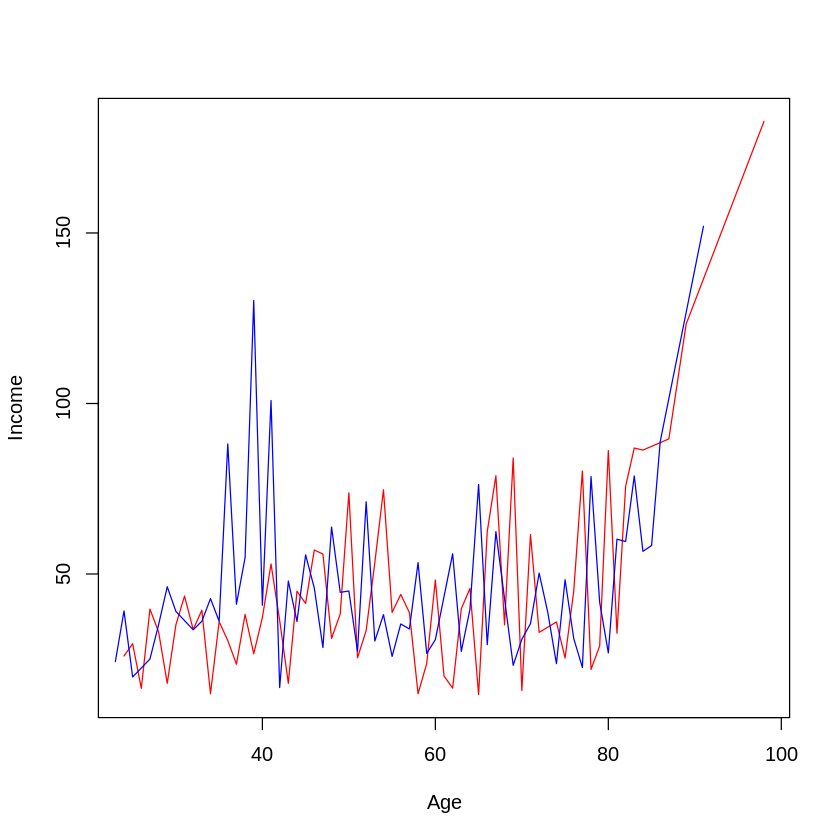

In [135]:
library(ISLR)

group_inc <- aggregate(Income ~ Age + Gender, data = Credit, mean)

m_data <- group_inc[group_inc$Gender == " Male", ]
nrow(m_data)

f_data <- group_inc[group_inc$Gender == "Female", ]
nrow(f_data)
with(m_data, plot(Age, Income, type = "l", col="red"))
with(f_data, lines(Age, Income, type = "l", col ="blue"))

`summarise()` has grouped output by 'Age'. You can override using the `.groups` argument.



[1] 63

[1] 62

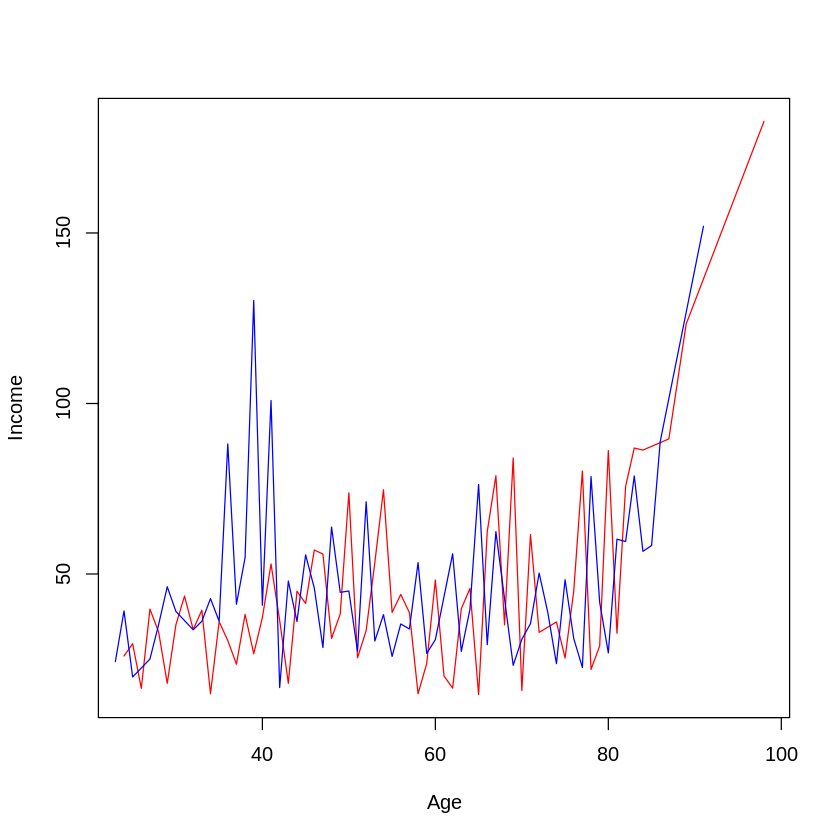

In [145]:
cd <- Credit %>%
select(Income, Age, Gender) %>%
group_by(Age, Gender) %>%
summarize(Income = mean(Income))

m_data <- cd %>% filter(Gender == " Male")
nrow(m_data)

f_data <- cd %>% filter(Gender == "Female")
nrow(f_data)

with(m_data, plot(Age, Income, type = "l", col="red"))
with(f_data, lines(Age, Income, type = "l", col ="blue"))


---

## 2.10. Binding rows and columns

`bind_rows(.data, …)` helps to unite two dataframes with the same columns order and names. 

So, if we need add one data frame to an other vertically (bind rows) we shoul use `bind_rows`:

In [115]:
d2002 <- gapminder %>%
            filter(year == 2002) %>% # year
            group_by(continent, year) %>% # grouping condition
            summarise(
                lifeExpAvg = mean(lifeExp),
                countriesCount = n() # n() count of rows in group                
            )

`summarise()` has grouped output by 'continent'. You can override using the `.groups` argument.



In [116]:
d2007 <- gapminder %>%
            filter(year == 2007) %>% # year
            group_by(continent, year) %>% # grouping condition
            summarise(
                lifeExpAvg = mean(lifeExp),
                countriesCount = n() # n() count of rows in group                
            )

`summarise()` has grouped output by 'continent'. You can override using the `.groups` argument.



Unite them:

In [117]:
d2002 %>% bind_rows(d2007) ## bind rows

continent,year,lifeExpAvg,countriesCount
<fct>,<int>,<dbl>,<int>
Africa,2002,53.32523,52
Americas,2002,72.42204,25
Asia,2002,69.23388,33
Europe,2002,76.70060,30
Oceania,2002,79.74000,2
Africa,2007,54.80604,52
Americas,2007,73.60812,25
Asia,2007,70.72848,33
Europe,2007,77.64860,30


`bind_cols(.data, …)` helps to unite two dataframes with the same rows count. 

In [224]:
grouped_data2002pop <- gapminder %>%
            filter(year == 2002) %>% # year
            group_by(continent) %>% # grouping condition
            summarise(
                totalPop = sum(pop)            
            ) %>%
            mutate(year = 2002)
grouped_data2002pop

continent,totalPop,year
<fct>,<dbl>,<dbl>
Africa,833723916,2002
Americas,849772762,2002
Asia,3601802203,2002
Europe,578223869,2002
Oceania,23454829,2002


Let's combine `grouped_data2002` and `popgrouped_data2002pop`:

In [228]:
grouped_data <- grouped_data2002 %>% 
                    bind_cols(grouped_data2002pop)
grouped_data

# columns with the same name were renamed!

New names:
* continent -> continent...1
* year -> year...4
* continent -> continent...5
* year -> year...7



continent...1,lifeExpAvg,countriesCount,year...4,continent...5,totalPop,year...7
<fct>,<dbl>,<int>,<dbl>,<fct>,<dbl>,<dbl>
Africa,53.32523,52,2002,Africa,833723916,2002
Americas,72.42204,25,2002,Americas,849772762,2002
Asia,69.23388,33,2002,Asia,3601802203,2002
Europe,76.70060,30,2002,Europe,578223869,2002
Oceania,79.74000,2,2002,Oceania,23454829,2002


You can remove same named variables before binding:

In [231]:
grouped_data <- grouped_data2002 %>% 
                    bind_cols(grouped_data2002pop %>%
                                select(-continent, -year))
grouped_data

# better, but continents order is not the same in both frames 
# your data is going to be damaged

continent,lifeExpAvg,countriesCount,year,totalPop
<fct>,<dbl>,<int>,<dbl>,<dbl>
Africa,53.32523,52,2002,833723916
Americas,72.42204,25,2002,849772762
Asia,69.23388,33,2002,3601802203
Europe,76.70060,30,2002,578223869
Oceania,79.74000,2,2002,23454829


In [88]:
grouped_data2002pop <- grouped_data2002pop %>% arrange(totalPop)

grouped_data <- grouped_data2002 %>% 
                    bind_cols(grouped_data2002pop)
grouped_data

# you can see that continent fields different in the same row

ERROR: Error in arrange(., totalPop): object 'grouped_data2002pop' not found


---

## 2.11. `Join()`ing data

To solve previous problem you can use set of `join()`-functions. `left_join()` can solve our previous example:

In [236]:
grouped_data2002pop <- grouped_data2002pop %>% arrange(totalPop)

grouped_data <- grouped_data2002 %>% 
                    left_join(grouped_data2002pop, by = "continent")
grouped_data

# but we have duplicated year

continent,lifeExpAvg,countriesCount,year.x,totalPop,year.y
<fct>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
Africa,53.32523,52,2002,833723916,2002
Americas,72.42204,25,2002,849772762,2002
Asia,69.23388,33,2002,3601802203,2002
Europe,76.70060,30,2002,578223869,2002
Oceania,79.74000,2,2002,23454829,2002


In [239]:
grouped_data2002pop <- grouped_data2002pop %>% arrange(totalPop)

grouped_data <- grouped_data2002 %>% 
                    left_join(grouped_data2002pop, by = c("continent", "year"))
grouped_data

#ok

continent,lifeExpAvg,countriesCount,year,totalPop
<fct>,<dbl>,<int>,<dbl>,<dbl>
Africa,53.32523,52,2002,833723916
Americas,72.42204,25,2002,849772762
Asia,69.23388,33,2002,3601802203
Europe,76.70060,30,2002,578223869
Oceania,79.74000,2,2002,23454829


Let's make a different data sets for testing `join()` fucntions:

In [241]:
first_df <- data.frame(Letter = c("A", "B", "C", "D", "E"),
                      Value = c(1:5))

second_df <- data.frame(Letter = c("A", "B", "C", "D", "F"),
                      Value = c(12, 7, 4, 1, 5))
first_df
second_df 

Letter,Value
<chr>,<int>
A,1
B,2
C,3
D,4
E,5


Letter,Value
<chr>,<dbl>
A,12
B,7
C,4
D,1
F,5


You can see that the last row `Letter` is different in dataframes. `left_join()` test is next.

In [246]:
first_df %>% left_join(second_df, by = "Letter")

# there is no F letter, becouse first_db joined only known first_df Letters.

Letter,Value.x,Value.y
<chr>,<int>,<dbl>
A,1,12
B,2,7
C,3,4
D,4,1
E,5,NA


In [248]:
first_df %>% right_join(second_df, by = "Letter")

# right_join! there is no E letter, becouse first_db joined only known second_df Letters.

Letter,Value.x,Value.y
<chr>,<int>,<dbl>
A,1,12
B,2,7
C,3,4
D,4,1
F,NA,5


In [251]:
first_df %>% inner_join(second_df, by = "Letter")

# inner_join! there is no E and F Letters, 
# only known both first_df and second_df are left here.

Letter,Value.x,Value.y
<chr>,<int>,<dbl>
A,1,12
B,2,7
C,3,4
D,4,1


In [301]:
first_df %>% full_join(second_df, by = "Letter")

# all are here, but unknown values replaced by NA, it's ok.

Letter,Value.x,Value.y
<chr>,<int>,<dbl>
A,1,12
B,2,7
C,3,4
D,4,1
E,5,NA
F,NA,5


Short description of reviewed functions:

|Function|Objectives|Arguments|Multiple keys|
|---|---|---|---|
|`left_join()`|Merge two datasets. Keep all observations from the origin table|	data, origin, destination, by = "ID" |	origin, destination, by = c("ID", "ID2")|
|`right_join()`|Merge two datasets. Keep all observations from the destination table	|data, origin, destination, by = "ID"	|origin, destination, by = c("ID", "ID2")|
|`inner_join()`|Merge two datasets. Excludes all unmatched rows	|data, origin, destination, by = "ID"|	origin, destination, by = c("ID", "ID2")|
|`full_join()`|Merge two datasets. Keeps all observations|	data, origin, destination, by = "ID"	|origin, destination, by = c("ID", "ID2")|

---

## 2.12. Data cleaning with `gather()`

Some times your data is not in tidy format. Peole can collect data year by year in each column. It's problem to use such data for feature engeniering and building prediction models. Let's generate such data sample (quaterly salary of some people).

In [257]:
not_good_data <- data.frame(Name = c("Nick", "Jake", "Anna", "Jane", "Dina"),
                           q1_2021 = c(12442, 22131, 21343, 22111, 14123),
                           q2_2021 = c(13442, 22871, 20343, 22222, 14456),
                           q3_2021 = c(15482, 22031, 22456, 22444, 14533),
                           q4_2021 = c(14511, 20031, 21741, 22333, 14511))
not_good_data

Name,q1_2021,q2_2021,q3_2021,q4_2021
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Nick,12442,13442,15482,14511
Jake,22131,22871,22031,20031
Anna,21343,20343,22456,21741
Jane,22111,22222,22444,22333
Dina,14123,14456,14533,14511


In [269]:
better_data <- not_good_data %>%
                gather(quater, salary, 2:5)
                # gather(quater, salary, q1_2021:q4_2021) possible code too
better_data

Name,quater,salary
<chr>,<chr>,<dbl>
Nick,q1_2021,12442
Jake,q1_2021,22131
Anna,q1_2021,21343
Jane,q1_2021,22111
Dina,q1_2021,14123
Nick,q2_2021,13442
Jake,q2_2021,22871
Anna,q2_2021,20343
Jane,q2_2021,22222


To make our data tidier `separate()` can split quater column into 2 (`quater` and `year`):

In [320]:
best_data <- better_data %>%
    separate(quater, c("quater", "year"), sep = "_") %>% # separate
    mutate(year = as.integer(year), # convert year to integer
           quater = substr(better_data$quater, 2,2), # trim `q` from start
           quater = as.integer(quater), # convert quater to integer
          ) %>%
    head(10)
best_data

,Name,quater,year,salary
,<chr>,<int>,<int>,<dbl>
1,Nick,1,2021,12442
2,Jake,1,2021,22131
3,Anna,1,2021,21343
4,Jane,1,2021,22111
5,Dina,1,2021,14123
6,Nick,2,2021,13442
7,Jake,2,2021,22871
8,Anna,2,2021,20343
9,Jane,2,2021,22222


The `unite()` function concanates two columns into one:

In [324]:
united_data <- best_data %>%
                unite(Qt, quater, year, sep = "#")
united_data

,Name,Qt,salary
,<chr>,<chr>,<dbl>
1,Nick,1#2021,12442
2,Jake,1#2021,22131
3,Anna,1#2021,21343
4,Jane,1#2021,22111
5,Dina,1#2021,14123
6,Nick,2#2021,13442
7,Jake,2#2021,22871
8,Anna,2#2021,20343
9,Jane,2#2021,22222


In [325]:
# if dont want remove old columns use remove param
united_data <- best_data %>%
                unite(Qt, quater, year, sep = "#", remove = F)
united_data

,Name,Qt,quater,year,salary
,<chr>,<chr>,<int>,<int>,<dbl>
1,Nick,1#2021,1,2021,12442
2,Jake,1#2021,1,2021,22131
3,Anna,1#2021,1,2021,21343
4,Jane,1#2021,1,2021,22111
5,Dina,1#2021,1,2021,14123
6,Nick,2#2021,2,2021,13442
7,Jake,2#2021,2,2021,22871
8,Anna,2#2021,2,2021,20343
9,Jane,2#2021,2,2021,22222


If you need to make table like initial use `spread()` function:

In [262]:
not_good_data2 <- better_data %>%
                    spread(quater, salary)
not_good_data2

Name,q1_2021,q2_2021,q3_2021,q4_2021
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Anna,21343,20343,22456,21741
Dina,14123,14456,14533,14511
Jake,22131,22871,22031,20031
Jane,22111,22222,22444,22333
Nick,12442,13442,15482,14511


Let's try to `spread()` feild `pop` of `gapminder` by year:

In [303]:
gapminder %>% select(country, pop, year) %>%
                spread(year, pop) %>%
                head() # for shorter code

# now you can easy send data to your director in excel :)

country,1952,1957,1962,1967,1972,1977,1982,1987,1992,1997,2002,2007
<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
Afghanistan,8425333,9240934,10267083,11537966,13079460,14880372,12881816,13867957,16317921,22227415,25268405,31889923
Albania,1282697,1476505,1728137,1984060,2263554,2509048,2780097,3075321,3326498,3428038,3508512,3600523
Algeria,9279525,10270856,11000948,12760499,14760787,17152804,20033753,23254956,26298373,29072015,31287142,33333216
Angola,4232095,4561361,4826015,5247469,5894858,6162675,7016384,7874230,8735988,9875024,10866106,12420476
Argentina,17876956,19610538,21283783,22934225,24779799,26983828,29341374,31620918,33958947,36203463,38331121,40301927
Australia,8691212,9712569,10794968,11872264,13177000,14074100,15184200,16257249,17481977,18565243,19546792,20434176


Functions table:

|Function|Objectives|Arguments|
|---|---|---|
|`gather()`|Transform the data from wide to long|(data, key, value, na.rm = FALSE)|
|`spread()`|Transform the data from long to wide|(data, key, value)|
|`separate()`|Split one variables into two|(data, col, into, sep= "", remove = TRUE)|
|`unite()`|Unite two variables into one|(data, col, conc ,sep= "", remove = TRUE)|

---

## Refences

1. [dplyr: A Grammar of Data Manipulation](https://cran.r-project.org/web/packages/dplyr/index.html) on https://cran.r-project.org/.
2. [Data Transformation with splyr::cheat sheet](https://github.com/rstudio/cheatsheets/blob/master/data-transformation.pdf).
3. [DPLYR TUTORIAL : DATA MANIPULATION (50 EXAMPLES)](https://www.listendata.com/2016/08/dplyr-tutorial.html) by Deepanshu Bhalla.

5. [Dplyr Intro](https://stat545.com/dplyr-intro.html) by Stat 545.
6.[R Dplyr Tutorial: Data Manipulation(Join) & Cleaning(Spread)](https://www.guru99.com/r-dplyr-tutorial.html). Introduction to Data Analysis
7. [Loan Default Prediction. Beginners data set for financial analytics Kaggle](https://www.kaggle.com/kmldas/loan-default-prediction)